In [1]:
import tensorflow as tf
# from keras import Dense
from tfkan import DenseKAN

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, n_targets=1, noise=0.1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [3]:
# MLP
mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
mlp.build(input_shape=(None, 10))
mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
%%time
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
mlp_history = mlp.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test, y_test), verbose=0)

CPU times: total: 27.8 s
Wall time: 1min 2s


In [4]:
# KAN
import keras
kan = tf.keras.models.Sequential([
    DenseKAN(4, kernel_initializer=keras.initializers.RandomNormal(stddev=0.1)),
    DenseKAN(1)
])

kan.build(input_shape=(None, 10))
kan.summary()

(10, 12)
(4, 12)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_kan_2 (DenseKAN)          │ (None, 4)              │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_kan_3 (DenseKAN)          │ (None, 1)              │            37 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (3.13 KB)

 Trainable params: 401 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
%%time
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
kan_history = kan.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=0)

CPU times: total: 8.59 s
Wall time: 13.7 s


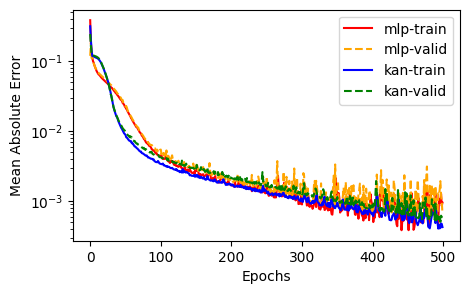

In [7]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.semilogy(mlp_history.history['mae'], label='mlp-train', ls="-", color='red')
plt.semilogy(mlp_history.history['val_mae'], label='mlp-valid', ls="--", color='orange')
plt.semilogy(kan_history.history['mae'], label='kan-train', ls="-", color='blue')
plt.semilogy(kan_history.history['val_mae'], label='kan-valid', ls="--", color='green')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()